<a href="https://colab.research.google.com/github/cjstntjd/project_study/blob/master/face_snow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


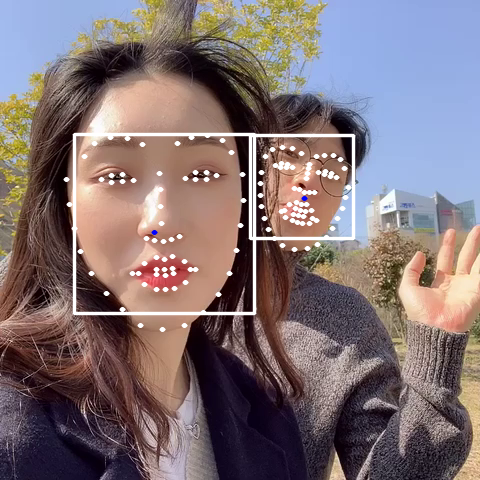

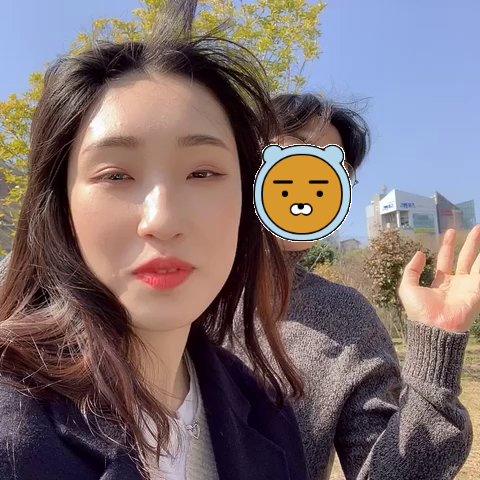

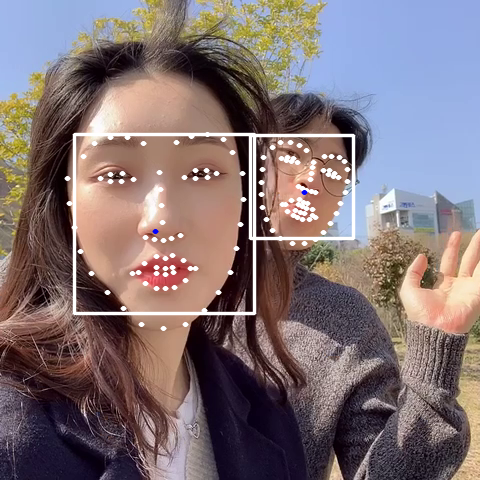

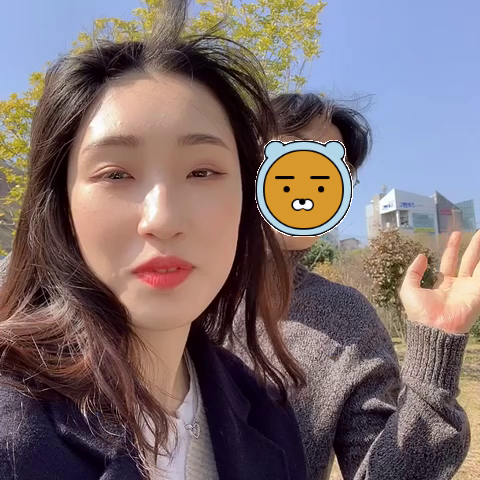

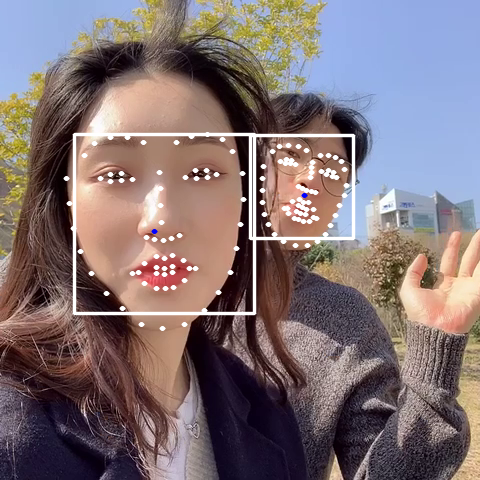

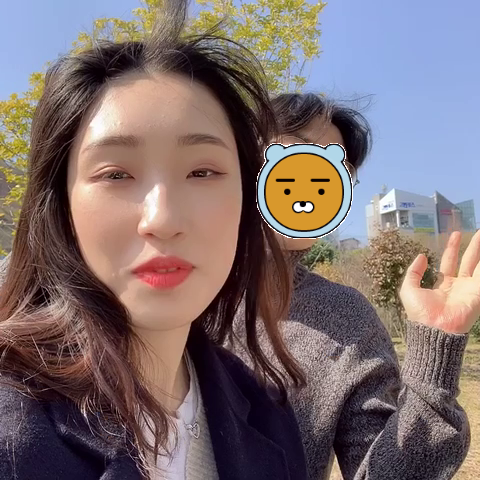

In [0]:
import cv2,sys,dlib
import numpy as np 
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture('/gdrive/My Drive/스터디/개인과제/스노우/face.mp4')
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/My Drive/스터디/개인과제/스노우/shape_predictor_68_face_landmarks.dat')

cover = cv2.imread('/gdrive/My Drive/스터디/개인과제/스노우/ryan.png', cv2.IMREAD_UNCHANGED)


def overlay_transparent(background_img, img_to_overlay_t, x, y, overlay_size=None):
  bg_img = background_img.copy()
  
  if bg_img.shape[2] == 3:
    bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2BGRA)

  if overlay_size is not None:
    img_to_overlay_t = cv2.resize(img_to_overlay_t.copy(), overlay_size)

  b, g, r, a = cv2.split(img_to_overlay_t)

  mask = cv2.medianBlur(a, 5)

  h, w, _ = img_to_overlay_t.shape
  roi = bg_img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]

  img1_bg = cv2.bitwise_and(roi.copy(), roi.copy(), mask=cv2.bitwise_not(mask))
  img2_fg = cv2.bitwise_and(img_to_overlay_t, img_to_overlay_t, mask=mask)

  bg_img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)] = cv2.add(img1_bg, img2_fg)

  
  bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGRA2BGR)

  return bg_img



while True:
    ret,img = capture.read()
    ori = img.copy()
    
    if not ret:
        break
    
    faces = detector(img)
    
    for i in range(len(faces)):
        cov = cv2.imread('/gdrive/My Drive/스터디/개인과제/스노우/ryan.png', cv2.IMREAD_UNCHANGED)
        face = faces[i]
        shape = predictor(img,face)
        shape_face = np.array([[p.x , p.y] for p in shape.parts()])
        cent = (np.min(shape_face, axis=0) + np.max(shape_face, axis=0))//2
        
        center_x, center_y = np.mean(shape_face, axis=0).astype(np.int)
        
        face_size = max(np.max(shape_face, axis=0) - np.min(shape_face, axis=0))
        
        final = overlay_transparent(ori , cov, center_x,center_y, overlay_size=(face_size,face_size))
        
        img = cv2.rectangle(img, pt1=(face.left(),face.top()), pt2 =(face.right(), face.bottom()), color = (255,255,255), thickness = 2,lineType = cv2.LINE_AA)
        
        for s in shape_face:
             cv2.circle(img, center=tuple(s), radius=1, color = (255,255,255), thickness=2, lineType = cv2.LINE_AA)
        
        cv2.circle(img, center=tuple(cent), radius=1, color = (255,0,0), thickness=2, lineType = cv2.LINE_AA)
        
        
    
    
    cv2_imshow(img)
    cv2_imshow(final)
    cv2.waitKey(20)
    